In [1]:
#pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\data.csv", sep=";");

### I need to know the fallowing things:

1. Number of attacks per side, per distance
2. Winning side count
3. Total amount of damage taken and inflicted
4. Comparison between state at start and at end of fight
5. Weapons lost and damaged

## Weapon system hit / miss chart

In [7]:
df.groupby(['Side', 'Weapon', 'Device', 'Status']).size().reset_index(name='Occured').sort_values(['Weapon', 'Side', 'Status'], ascending=False)

,Side,Weapon,Device,Status,Occured
8,UA,T72B3,2A46,MISS,2
7,UA,T72B3,2A46,HIT,3
3,RU,T72B3,2A46,MISS,2
2,RU,T72B3,2A46,HIT,4
6,UA,Javelin,FGM-148,HIT,28
5,UA,BMP1,2A42,MISS,5
4,UA,BMP1,2A42,HIT,2
1,RU,BMP1,2A42,MISS,4
0,RU,BMP1,2A42,HIT,3


## Weapon fire per distance breakdown

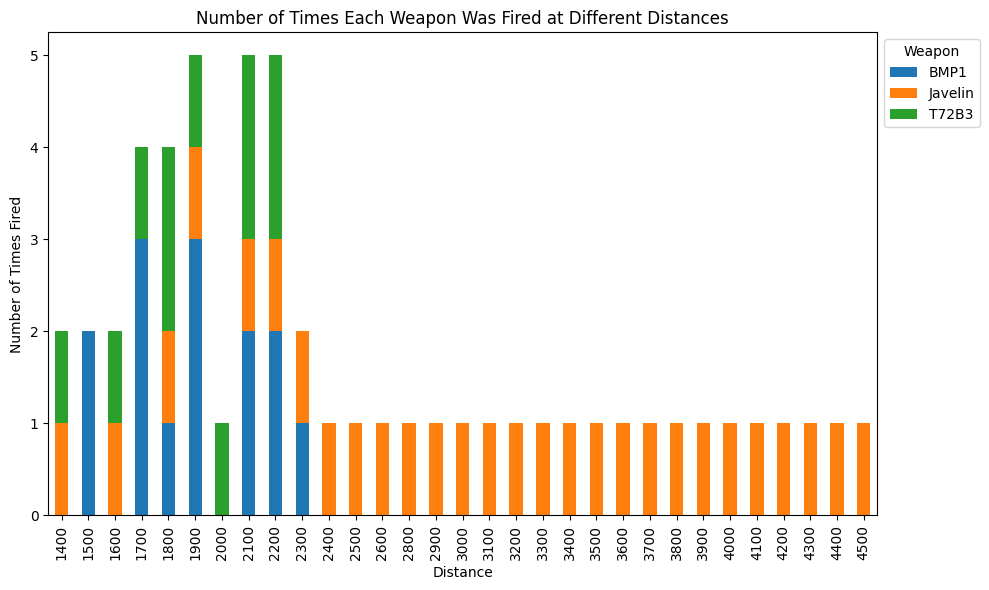

In [6]:
weapon_distance_counts = df.groupby(['Weapon', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Weapon', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()